In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [2]:
df=pd.read_csv('final_crop_dataset.csv')
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Crop
0,Bhopal,Bhopal(F&V),Other,Fruits,36.0,800.0,1200.0,1000.0,2023-06-22,Karbuja
1,Bhopal,Bhopal(F&V),Other,Fruits,108.0,600.0,1000.0,800.0,2023-06-15,Karbuja
2,Bhopal,Bhopal(F&V),Other,Fruits,99.0,600.0,1000.0,800.0,2023-06-14,Karbuja
3,Bhopal,Bhopal(F&V),Other,Fruits,45.0,600.0,1000.0,800.0,2023-06-13,Karbuja
4,Bhopal,Bhopal(F&V),Other,Fruits,18.0,600.0,1000.0,800.0,2023-06-12,Karbuja


In [3]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

In [9]:
df['Year']=df['Reported Date'].dt.year

In [84]:
class Crop:
    def __init__(self, df):
        self.df = df
        self.districts = df['District Name'].unique().tolist()
        self.crops = df['Crop'].unique().tolist()
        # print(self.crops)

    def district_selection_crop_based(self, crop, year=None): #algorithm to recommend the best district suitable for a crop.
            
        df_filt = self.df[self.df['Crop']==crop]
        correlation_dict = {}
        for district in df_filt['District Name'].unique().tolist():
            
            df_final = df_filt[df_filt['District Name']==district]
            if len(df_final)>50:
                corr_val = df_final['Arrivals (Tonnes)'].corr(df_final['Modal Price (Rs./Quintal)'])
                correlation_dict[district]=corr_val
        correlation_dict = dict(sorted(correlation_dict.items(), key=lambda item:item[1], reverse=True))
        # print(correlation_dict)
        dist_names = list(correlation_dict.keys())
        corr_values = list(correlation_dict.values())
        plt.figure(figsize=(18,5))
        sns.barplot(x = dist_names, y = corr_values)
        plt.title(f" District recommendation based on crop {crop}")


    def crop_selection_district_based(self, district, year=None): #algorithm to recommend best crop suitable for a district

        df_filt = self.df[self.df['District Name']==district]
        correlation_dict = {}
        for crop in df_filt['Crop'].unique().tolist():
            
            df_final = df_filt[df_filt['Crop']==crop]
            if len(df_final)>50:
                corr_val = df_final['Modal Price (Rs./Quintal)'].corr(df_final['Arrivals (Tonnes)'])
                correlation_dict[crop]=corr_val
        print(correlation_dict)
        correlation_dict = dict(sorted(correlation_dict.items(), key=lambda item:item[1], reverse=True))

        crop_names = list(correlation_dict.keys())
        corr_values = list(correlation_dict.values())
        plt.figure(figsize=(18,5))
        sns.barplot(x = crop_names, y = corr_values)
        plt.title(f" Crop recommendation based on district {district}")

    def price_trend_districts(self, crop, district=None):
    
        district_data = self.df[(self.df['Crop']==crop)]
        district_data['Reported Date'] = pd.to_datetime(district_data['Reported Date'])
        district_data.set_index('Reported Date', inplace=True)
        sns.lineplot(district_data['Modal Price (Rs./Quintal)'])
    
        plt.title(f"Price Trend of {crop}")
        plt.xlabel("Date")
        plt.ylabel("Modal Price (Rs./Quintal)")
        plt.xticks(rotation=45)
        plt.show()


    def relation_determination(self, feat1, feat2, crop):

        df_filt = self.df[self.df['Crop']==crop]
        districts = df_filt['District Name'].unique().tolist()
        num_districts = len(districts)
        n_cols = 2
        n_rows = (num_districts + 1)//n_cols
        plt.figure(figsize=(n_cols*6, n_rows*6))
        palette = sns.color_palette("viridis", as_cmap=False, n_colors=len(df_filt['Year'].unique()))


        for idx, district in enumerate(districts, start=1):
            df_final = df_filt[df_filt['District Name']==district]
            ax = plt.subplot(n_rows, n_cols, idx)
            sns.scatterplot(data = df_final, x = feat1, y = feat2, ax = ax, hue = 'Year', palette=palette)
            ax.set_title(f'{district} - {crop}')
            ax.set_xlabel(feat1)
            ax.set_ylabel(feat2)


    def distribution_arrival_based_on_markets(self, crop):  #function helps to create a pie chart for visualizing the arrival quantity's proportion in each district's market

        df_filt = self.df[self.df['Crop']==crop]
        districts = df_filt['District Name'].unique().tolist()
        num_districts = len(districts)
        n_cols = 3
        n_rows = (num_districts + 1)//n_cols
        plt.figure(figsize=(n_cols*6, n_rows*6))
        
        for idx, district in enumerate(districts, start=1):
            df_final = df_filt[df_filt['District Name']==district]
            pie_dict = {}
            total = df_final['Arrivals (Tonnes)'].sum()
            for market in df_final['Market Name'].unique().tolist():
                df_market = df_final[df_final['Market Name']==market]
                
                market_total = df_market['Arrivals (Tonnes)'].sum()
                pie_dict[market] = market_total/total
            print(pie_dict)
            ax = plt.subplot(n_rows, n_cols, idx)
            plt.pie(pie_dict.values(), labels=pie_dict.keys())
            ax.set_title(f'{district}')
                
    def distribution_of_crops_based_on_district(self, district):
        df_filt = self.df[self.df['District Name']==district]
        total = df_filt['Arrivals (Tonnes)'].sum()
        pie_dict ={}
        for crop in df_filt['Crop'].unique().tolist():
            df_final = df_filt[df_filt['Crop']==crop]
            pie_dict[crop] = df_final['Arrivals (Tonnes)'].sum()/total
        plt.pie(pie_dict.values(), labels=pie_dict.keys())
            
                 


c=Crop(df)

{'Leafy Vegetable': -0.3679930053283877, 'Lemon': -0.044211387197720005, 'Mango': 0.17323982946667274, 'Masur Dal': -0.12583510748573246, 'Neem Seed': 0.252971563664371, 'Orange': -0.12351775682873156, 'Papaya': -0.11756359672220346, 'Peas Wet': -0.17842333128926824}


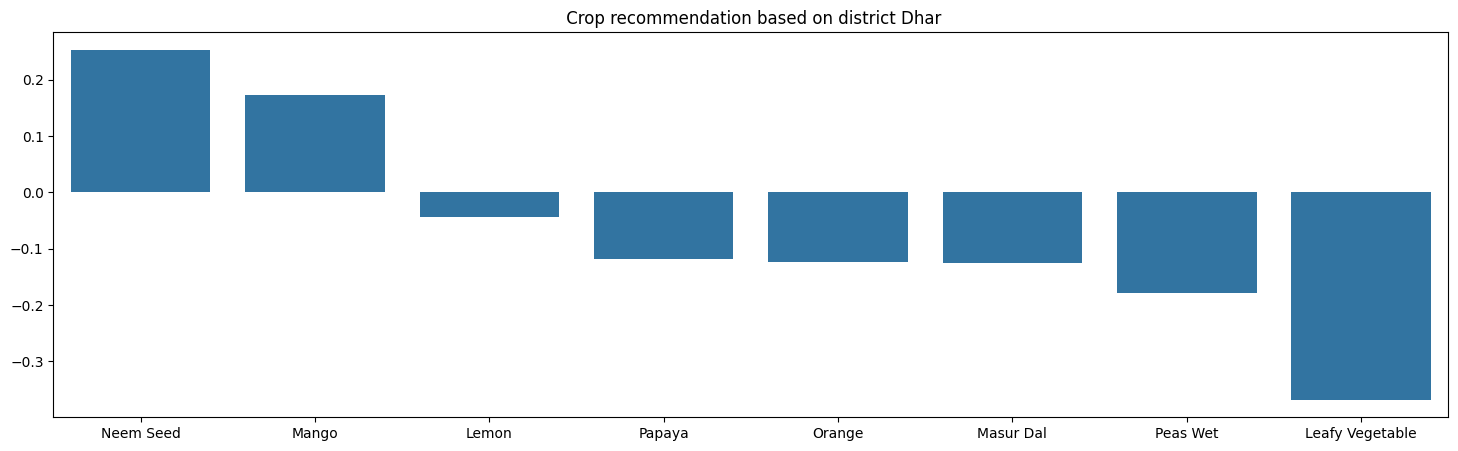

In [85]:
c.crop_selection_district_based('Dhar')

**From the bar chart it is clearly recommending Neem Seed as the best crop for Dhar district**

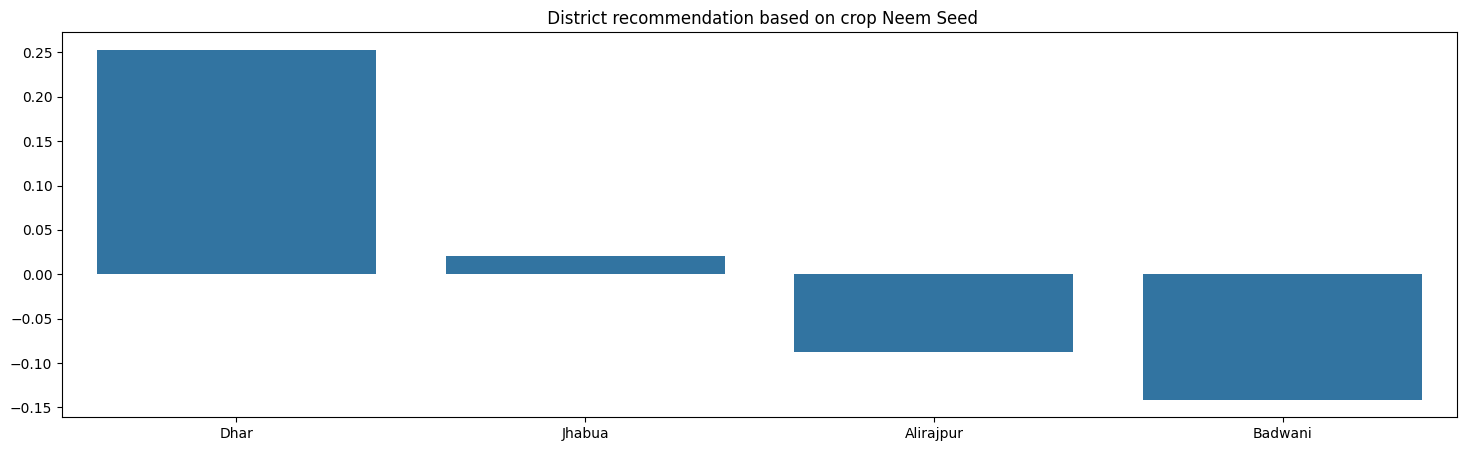

In [86]:
c.district_selection_crop_based('Neem Seed')

**The above Bar chart recommends Dhar disrict for Neem Seed**

C:\Users\admin\AppData\Local\Temp\ipykernel_17960\3778599669.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_data['Reported Date'] = pd.to_datetime(district_data['Reported Date'])


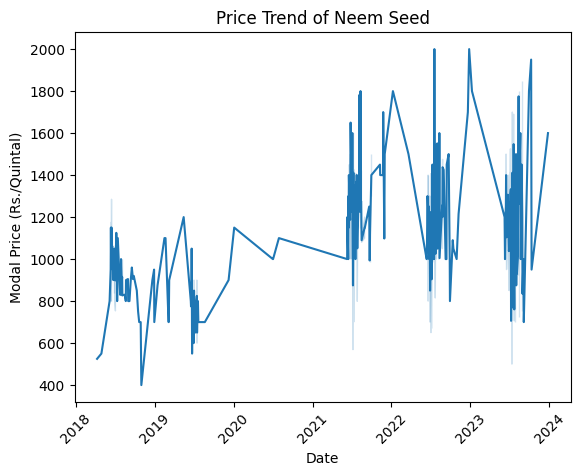

In [87]:
c.price_trend_districts('Neem Seed')

In [88]:
df['Crop'].unique()

array(['Karbuja', 'Kartali', 'Kinnow', 'Kodo Millet(Varagu)',
       'Kulthi(Horse Gram)', 'Lak(Teora)', 'Leafy Vegetable', 'Lemon',
       'Lime', 'Little gourd (Kundru)', 'Mango', 'Masur Dal',
       'Mint(Pudina)', 'Mousambi(Sweet Lime)', 'Mustard Oil',
       'Myrobolan(Harad)', 'Neem Seed', 'Orange', 'Paddy(Dhan)(Basmati)',
       'Papaya (Raw)', 'Papaya', 'Pear(Marasebu)', 'Peas cod', 'Peas Wet'],
      dtype=object)

In [89]:
df['District Name'].unique()

array(['Bhopal', 'Burhanpur', 'Chhindwara', 'Narsinghpur', 'Guna',
       'Harda', 'Indore', 'Hoshangabad', 'Katni', 'Gwalior', 'Morena',
       'Jhabua', 'Satna', 'Badwani', 'Singroli', 'Sheopur', 'Ujjain',
       'Anupur', 'Rewa', 'Balaghat', 'Shehdol', 'Mandla', 'Seoni',
       'Dindori', 'Sidhi', 'Umariya', 'Panna', 'Khargone', 'Chhatarpur',
       'Raisen', 'Dhar', 'Sagar', 'Sehore', 'Ratlam', 'Shivpuri',
       'Khandwa', 'Mandsaur', 'Jabalpur', 'Ashoknagar', 'Vidisha',
       'Bhind', 'Betul', 'Damoh', 'Rajgarh', 'Alirajpur', 'Datia',
       'Shajapur', 'Dewas'], dtype=object)

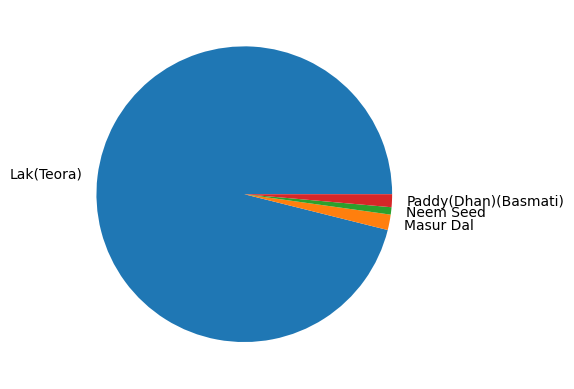

In [90]:
c.distribution_of_crops_based_on_district('Ashoknagar')

**From this Pie chart it is clear that the crop Lak(Teora) is prominent in terms of arrival rate in the district Ashoknagar**

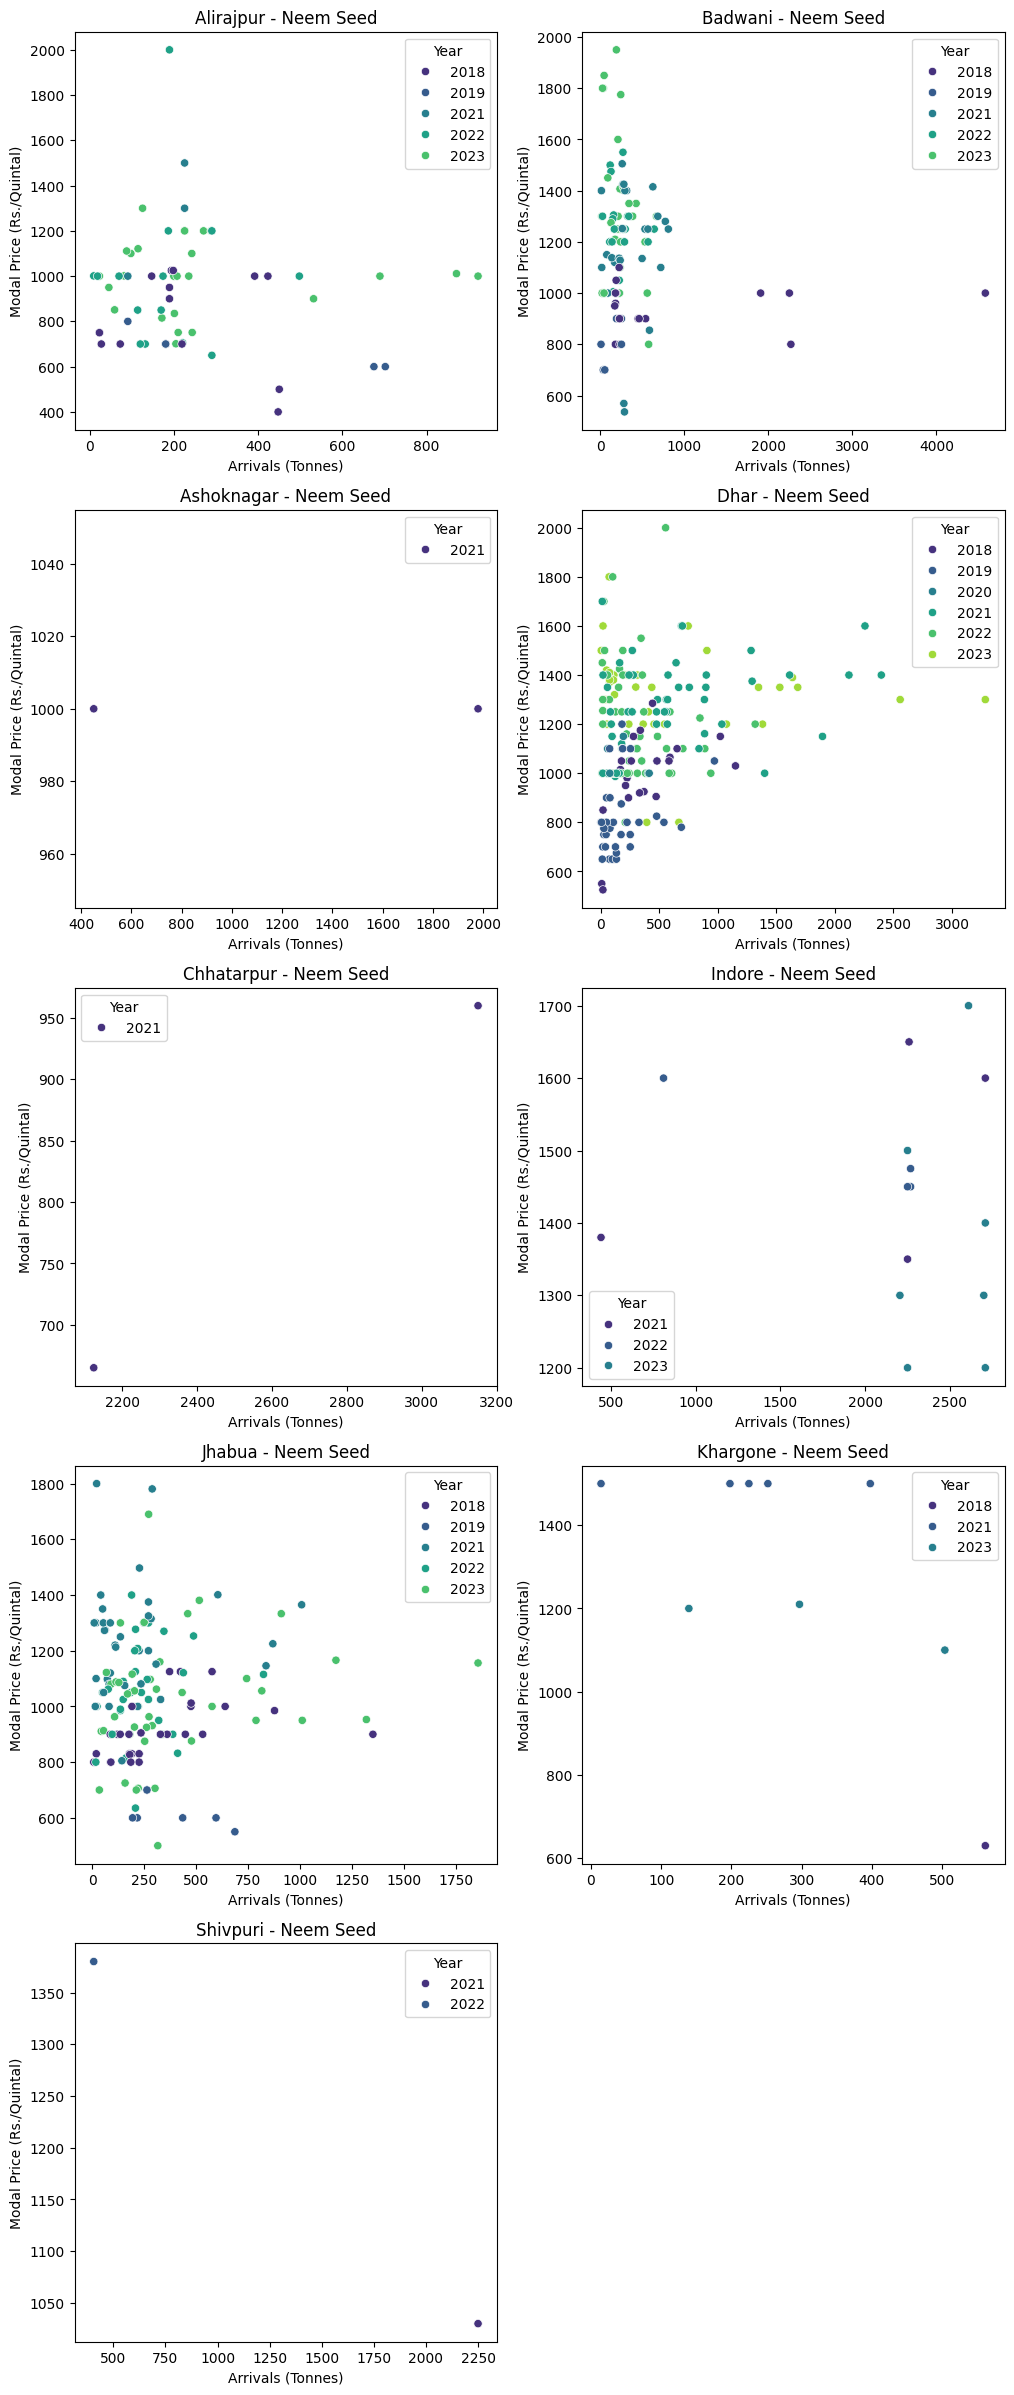

In [91]:
c.relation_determination('Arrivals (Tonnes)','Modal Price (Rs./Quintal)', 'Neem Seed')

**These scatter plots helps to identify relations of different features of the crop**

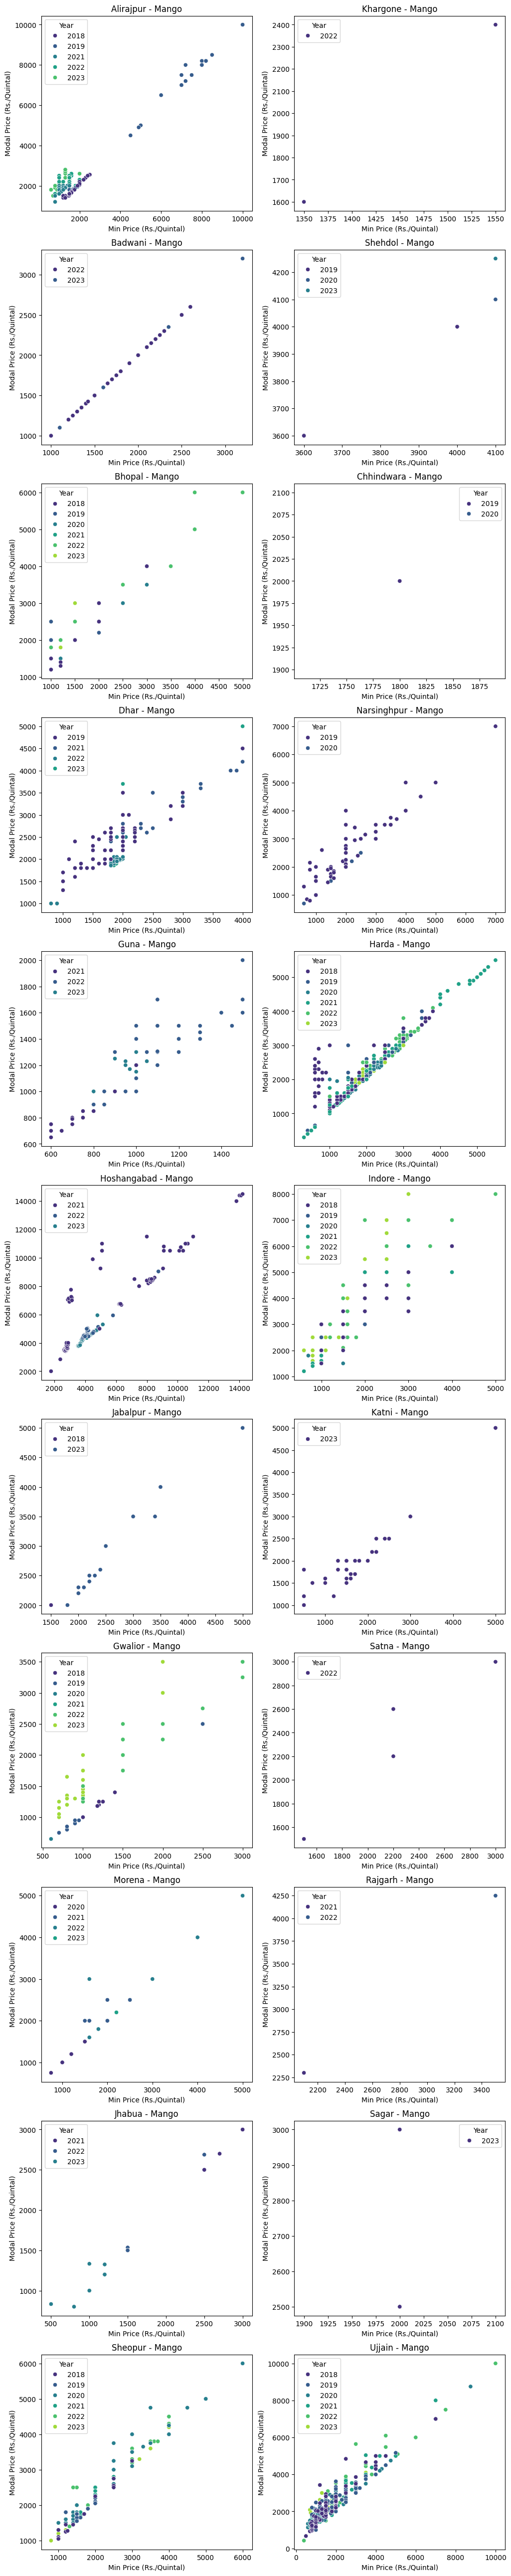

In [92]:
c.relation_determination('Min Price (Rs./Quintal)','Modal Price (Rs./Quintal)', 'Mango')

{'Alirajpur': 0.07927070947284978, 'Jobat': 0.9207292905271501}
{'Anjad': 0.5020513406191799, 'Badwani': 0.49685051129774743, 'Balwadi': 0.0010981480830727062}
{'Ashoknagar': 1.0}
{'Badnawar': 0.00023548804898151422, 'Dhamnod': 0.013594082827569229, 'Gandhwani': 0.03678965565224838, 'Manawar': 0.949380773471201}
{'Bijawar': 1.0}
{'Gautampura': 1.0}
{'Jhabua': 0.6926517262656123, 'Petlawad': 0.30734827373438783}
{'Kasrawad': 1.0}
{'Khaniadhana': 0.8471704506946798, 'Pichhour': 0.15282954930532022}


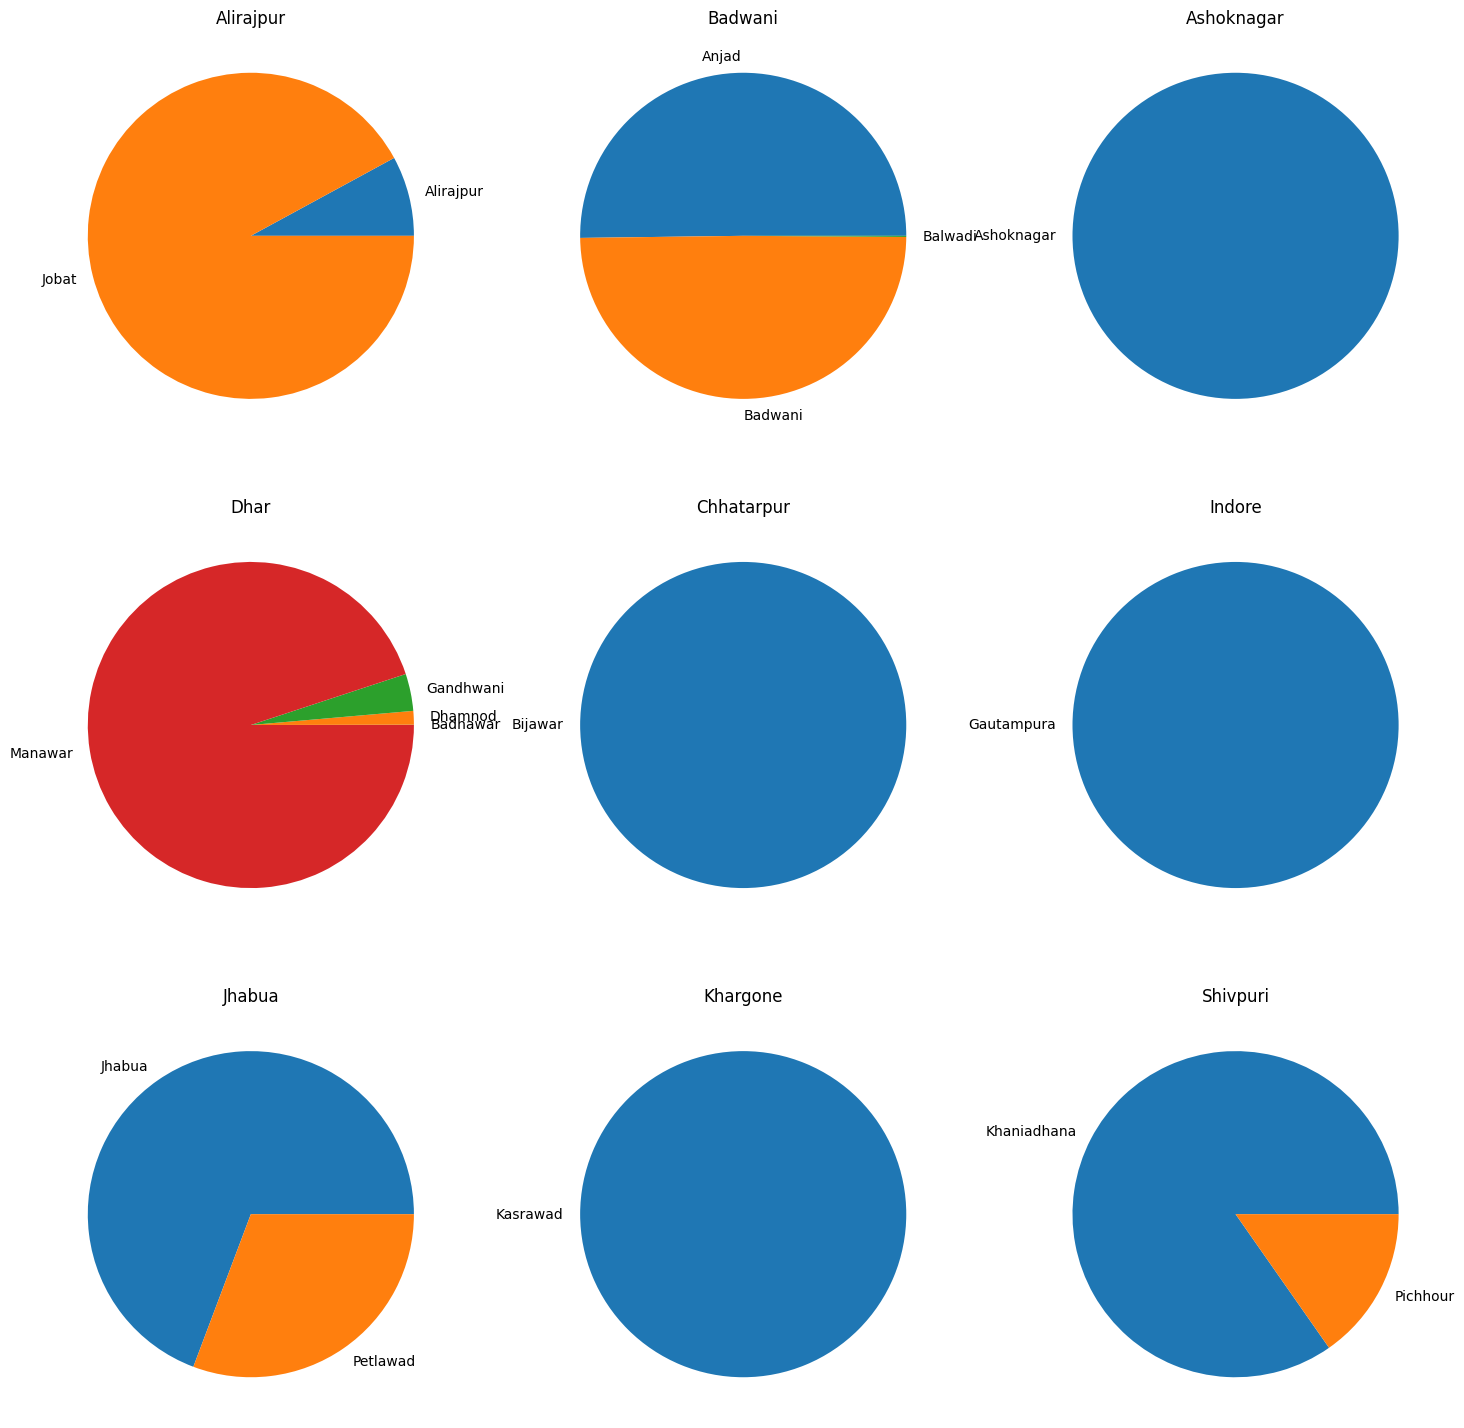

In [94]:
c.distribution_arrival_based_on_markets('Neem Seed')

**These Pie charts represent the market share of Crop arrival(tonnes) based on a single crop in different districts**